In [1]:
#importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [3]:
#reading data
data = pd.read_csv('Continuous_Distributions/churn_prediction.csv')

In [4]:
#first look
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [5]:
#features of the dataset
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [6]:
#shape of the data
data.shape

(28382, 21)

# Basics

In [7]:
#distribution of gender
data['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

Number of Male Customers is greater than Number of Female Customers in our data

In [ ]:
data['gender'].value_counts()/sum(data['gender'].value_counts().values)

Male      0.594034
Female    0.405966
Name: gender, dtype: float64

In [ ]:
data['gender'].value_counts(normalize=True)

Male      0.594034
Female    0.405966
Name: gender, dtype: float64

Approximately 60% Customers are Male Customers and 40% Customers are female Customers

In [ ]:
data['occupation'].nunique()

5

There are total 5 unique categories for occupation feature in our data

In [ ]:
data['occupation'].mode()

0    self_employed
dtype: object

* For occupation category, Most number of customers will follow __'Self employed'__ occupation
* For occupation category, Mode is self employed which is represented by 0 in our dataset

In [ ]:
data['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

* Most customer follow Self Employed Profession in our dataset
* Very Few Customers follow Company Profession in our dataset

# Bernoulli 

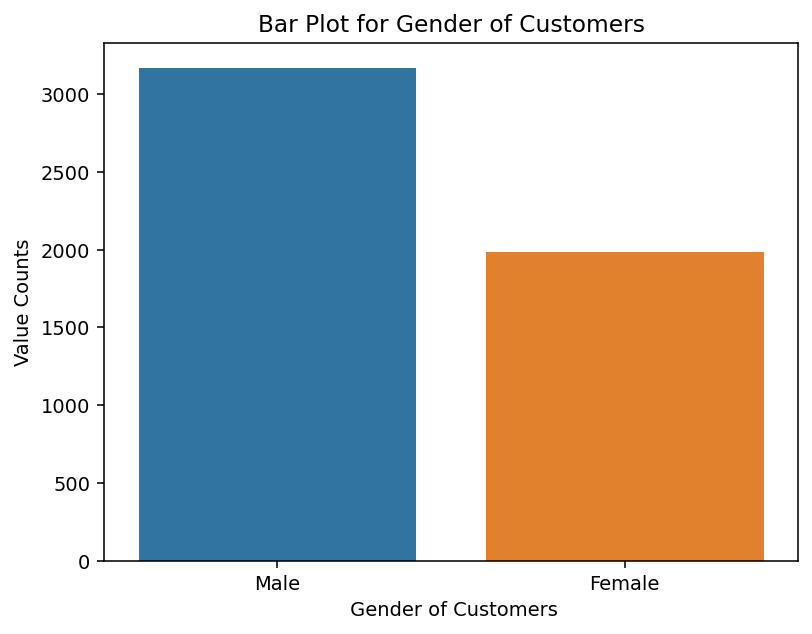

In [8]:
plt.figure(dpi = 140)
sns.barplot(x=data[data['churn']==1]['gender'].value_counts().index, y = data[data['churn']==1]['gender'].value_counts().values)
plt.xlabel(" Gender of Customers")
plt.ylabel('Value Counts')
plt.title("Bar Plot for Gender of Customers")
plt.show()



There are more Male Customers who are churning than the female customers who are churning

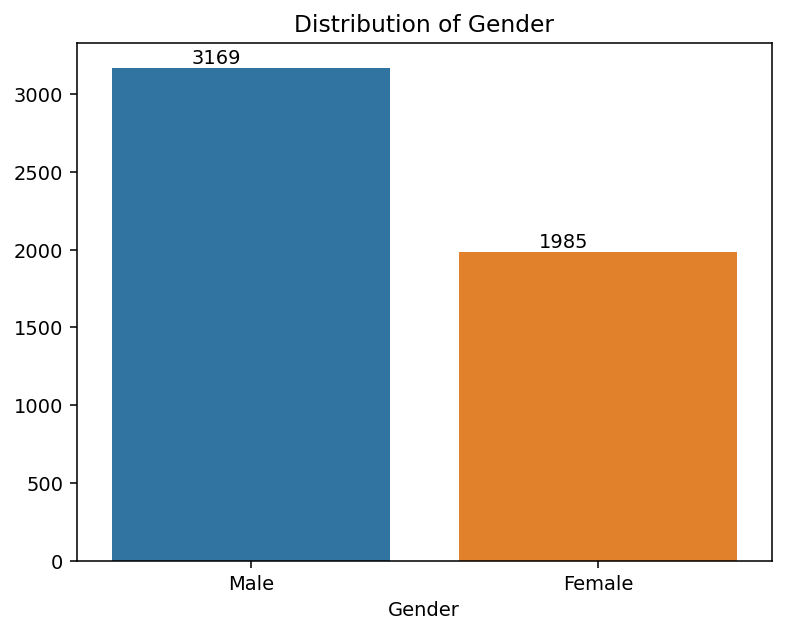

In [13]:
plt.figure(dpi = 140)
ax = sns.barplot(x=data[data['churn']==1]['gender'].value_counts().index, y=data[data['churn']==1]['gender'].value_counts().values, orient = 'v')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
for p in ax.patches:
        ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.show()

3169 Male customers are churning in compare to 1985 female customers.

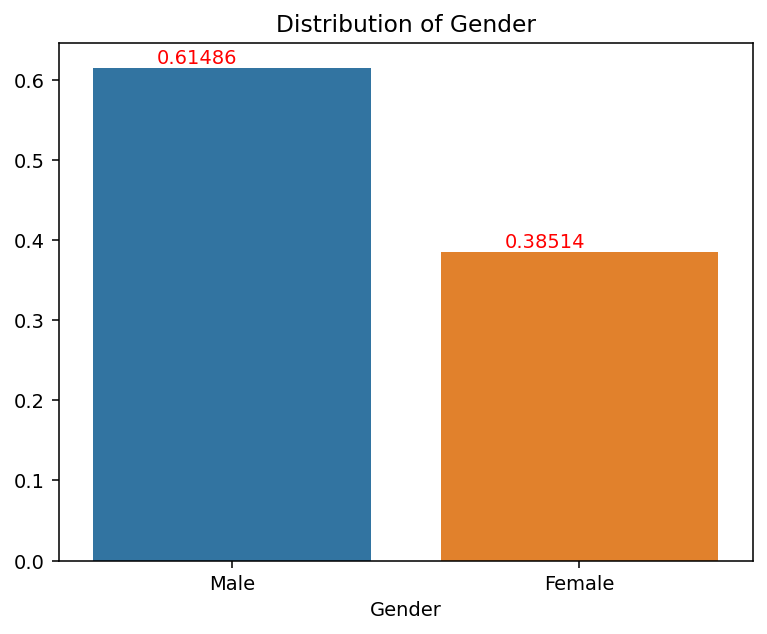

In [49]:
plt.figure(dpi = 140)
ax = sns.barplot(x=data[data['churn']==1]['gender'].value_counts().index, y = data[data['churn']==1]['gender'].value_counts(normalize=True).values, orient = 'v')
plt.title('Distribution of Gender')
plt.xlabel('Gender')

for p in ax.patches:
        ax.annotate('{:1.5f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'red')
        
plt.show()

* Around 61% of Churning Customers are Male Customers in our Dataset
* Around 39% of Churning Customers are female Customers in our Dataset

# Categorical

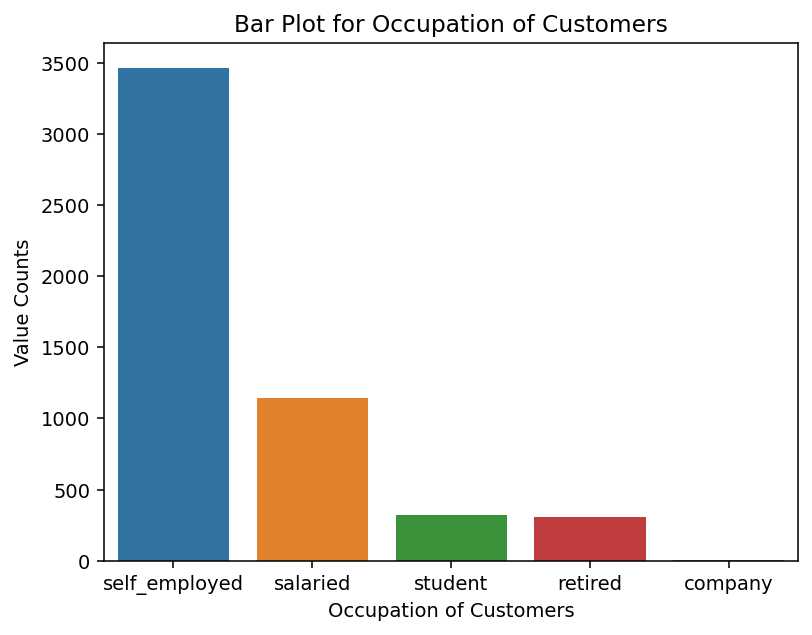

In [50]:
plt.figure(dpi = 140)
sns.barplot(x=data[data['churn']==1]['occupation'].value_counts().index, y = data[data['churn']==1]['occupation'].value_counts().values)
plt.xlabel("Occupation of Customers")
plt.ylabel('Value Counts')
plt.title("Bar Plot for Occupation of Customers")
plt.show()


* Highest Number of Customers are churning from self employed profession followed by salaried.
* Number of Customers who are churning from Student and retired category are close to each other.
* Company as a profession has the least number of customers who are churning

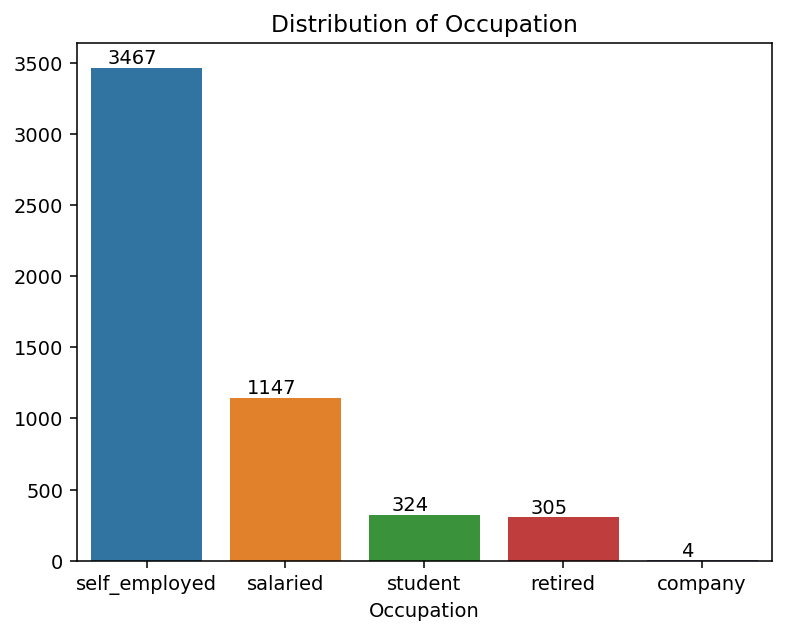

In [51]:
plt.figure(dpi = 140)
ax = sns.barplot(x=data[data['churn']==1]['occupation'].value_counts().index, y = data[data['churn']==1]['occupation'].value_counts().values, orient = 'v')
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.show()

* 3467 Customers are churning from self employed category
* 1147 customers are churning from salaried category
* 324 and 305 customers are churning from student and retired category
* Only 4 customers are churning from company profession

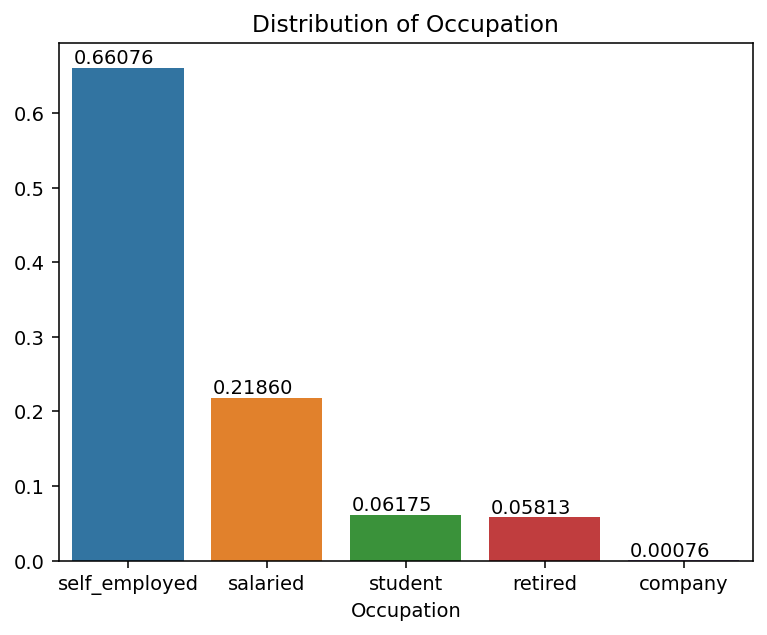

In [52]:
plt.figure(dpi = 140)
ax = sns.barplot(x=data[data['churn']==1]['occupation'].value_counts().index, y = data[data['churn']==1]['occupation'].value_counts(normalize=True).values, orient = 'v')
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')

for p in ax.patches:
        ax.annotate('{:1.5f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.show()

* Almost 66 % of the customers who are churning belong to self employed profession
* Followed by 21% of customers who are churning belong to salaried profession